In [1]:
# Connection to the Vertica Database using ODBC.
import pyodbc
import pandas
import numpy as np
import sys

# Import the Vertica ML Python library 
from vertica_ml_python import RVD
from vertica_ml_python import read_csv # This function will help us to load the csv file in the Database.
from vertica_ml_python import drop_table # This function will help us to drop the unnecessary tables.
from vertica_ml_python import drop_view

cur=pyodbc.connect("DSN=VerticaDSN").cursor()

In [ ]:
# If the table is already in the Database. We can create the RVD as follows:
ChangeData=RVD('ChangeData',cur)

In [2]:
# Drop table in database if it exists
drop_table("ChangeData",cur)
# red csv file to RVD
ChangeData=read_csv('../datasets/ChangeData.csv',cur)

The table ChangeData was successfully dropped.
The parser guess the following columns and types:
ASSETS: Integer
ASSOCIATED_CHANGES: Integer
CATEGORY: Varchar(34)
CHILD_CHANGES: Integer
COLLISION_SEVERITY: Varchar(20)
DEPENDENT_CHANGES: Integer
FINANCIAL_IMPACT: Varchar(20)
GL_NUMBER: Varchar(20)
HP_CR_HIGH_THLD_NR: Integer
HP_CR_SCORE_NR: Integer
HP_IMPC_ANAL_FND_CT: Integer
IMPACT_ORGS: Integer
IMPACT_SEVERITY: Varchar(20)
INCIDENTS: Integer
INTERACTIONS: Integer
KNOWNERRORS: Integer
MAJOR_INCIDENTS: Integer
ML_CHG_IMPC_ASMT_KY: Varchar(120)
ML_CR_SCORE_RSLT_KY: Integer
NUMBER: Varchar(20)
OVO_OUTAGES: Integer
PARENT_CHANGES: Integer
PLN_IMP_DURATION: Float
PREDECESSOR_CHANGES: Integer
PRIORITY_CODE: Integer
PROBLEMS: Integer
REQ_IMP_DURATION: Float
RISK_ASSESSMENT: Integer
RISK_SEVERITY: Varchar(20)
SEVERITY: Integer
TASKS: Integer
TIME_PERIOD_CONFLICT: Boolean
Illegal characters in the columns names will be erased.
Is any type wrong?
If one of the types is not correct, it will be c

In [3]:
ChangeData.describe()

,count,mean,std,min,25%,50%,75%,max,cardinality
ASSETS,38757,9.13055706065996,44.1922187481697,0.0,1.0,2.0,5.0,3731.0,347
ASSOCIATED_CHANGES,38757,0.00926284284129324,0.127868535033142,0.0,0.0,0.0,0.0,8.0,7
CHILD_CHANGES,38757,0.000541837603529685,0.0317175377952987,0.0,0.0,0.0,0.0,4.0,4
DEPENDENT_CHANGES,38757,0.000851459091260925,0.0308863381656352,0.0,0.0,0.0,0.0,2.0,3
HP_CR_HIGH_THLD_NR,24464,67.1451929365596,12.7728293350563,10.0,70.0,70.0,70.0,70.0,2
HP_CR_SCORE_NR,27872,61.8130022962111,66.0781927564784,0.0,22.0,42.0,75.0,547.0,148
HP_IMPC_ANAL_FND_CT,33677,63.598449980699,555.077879147998,-51.0,0.0,5.0,28.0,46366.0,1069
IMPACT_ORGS,38757,0.0833655855716385,0.307375106187973,0.0,0.0,0.0,0.0,7.0,8
INCIDENTS,38757,0.310214928916064,0.703288464134569,0.0,0.0,0.0,1.0,46.0,23
INTERACTIONS,38757,0.000154810743865625,0.0124414939367539,0.0,0.0,0.0,0.0,1.0,2


<column_matrix>

In [4]:
print(sys.getsizeof(ChangeData))

56


In [5]:
ChangeData.head(5)
ChangeData.dtypes()

,ASSETS,ASSOCIATED_CHANGES,CATEGORY,CHILD_CHANGES,COLLISION_SEVERITY,DEPENDENT_CHANGES,FINANCIAL_IMPACT,GL_NUMBER,HP_CR_HIGH_THLD_NR,HP_CR_SCORE_NR,HP_IMPC_ANAL_FND_CT,IMPACT_ORGS,IMPACT_SEVERITY,INCIDENTS,INTERACTIONS,KNOWNERRORS,MAJOR_INCIDENTS,ML_CHG_IMPC_ASMT_KY,ML_CR_SCORE_RSLT_KY,NUMBER,OVO_OUTAGES,PARENT_CHANGES,PLN_IMP_DURATION,PREDECESSOR_CHANGES,PRIORITY_CODE,PROBLEMS,REQ_IMP_DURATION,RISK_ASSESSMENT,RISK_SEVERITY,SEVERITY,TASKS,TIME_PERIOD_CONFLICT
0,0,0,KM Document,0,None,0,None,None,None,0,None,0,None,0,0,0,0,3,1,C11000003,0,0,604800000.0,0,3,0,0.0,0,None,3,0,None
1,0,0,KM Document,0,None,0,None,None,None,0,None,0,None,0,0,0,0,3,1,C11000022,0,0,604800000.0,0,3,0,0.0,0,None,3,0,None
2,0,0,KM Document,0,None,0,None,None,None,0,None,0,None,0,0,0,0,3,1,C11000023,0,0,604799000.0,0,3,0,0.0,0,None,3,0,None
3,0,0,KM Document,0,None,0,None,None,None,0,None,0,None,0,0,0,0,3,1,C11000024,0,0,604800000.0,0,3,0,0.0,0,None,3,0,None
4,0,0,KM Document,0,None,0,None,None,None,0,None,0,None,0,0,0,0,3,1,C11000025,0,0,604799001.0,0,3,0,0.0,0,None,3,0,None
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


Name: ChangeData, Number of rows: 38757, Number of columns: 32


,type
ASSETS,int
ASSOCIATED_CHANGES,int
CATEGORY,varchar(34)
CHILD_CHANGES,int
COLLISION_SEVERITY,varchar(20)
DEPENDENT_CHANGES,int
FINANCIAL_IMPACT,varchar(20)
GL_NUMBER,varchar(20)
HP_CR_HIGH_THLD_NR,int
HP_CR_SCORE_NR,int


Name: ChangeData,Number of rows: 38757,Number of columns: 32


In [6]:
ChangeData.missing()

,total,percent
FINANCIAL_IMPACT,38757,1.0
COLLISION_SEVERITY,36944,0.953
IMPACT_SEVERITY,36944,0.953
RISK_SEVERITY,36944,0.953
TIME_PERIOD_CONFLICT,36944,0.953
SEVERITY,34713,0.896
HP_CR_HIGH_THLD_NR,14293,0.369
HP_CR_SCORE_NR,10885,0.281
ML_CR_SCORE_RSLT_KY,10885,0.281
HP_IMPC_ANAL_FND_CT,5080,0.131


<column_matrix>

The percent above should multiply 100! We can see the first 6 columns have too much of missing values. 
We can drop them from our RVD (the ChangeData table will never be modified: all the actions are only on our RVD).

In [7]:
# drop columns that have too many nulls
ChangeData["FINANCIAL_IMPACT"].drop_column()
ChangeData["COLLISION_SEVERITY"].drop_column()
ChangeData["IMPACT_SEVERITY"].drop_column()
ChangeData["RISK_SEVERITY"].drop_column()
ChangeData["TIME_PERIOD_CONFLICT"].drop_column()
ChangeData["SEVERITY"].drop_column()
ChangeData["GL_NUMBER"].drop_column()

RVC 'FINANCIAL_IMPACT' deleted from the RVD.
RVC 'COLLISION_SEVERITY' deleted from the RVD.
RVC 'IMPACT_SEVERITY' deleted from the RVD.
RVC 'RISK_SEVERITY' deleted from the RVD.
RVC 'TIME_PERIOD_CONFLICT' deleted from the RVD.
RVC 'SEVERITY' deleted from the RVD.
RVC 'GL_NUMBER' deleted from the RVD.


In [8]:
# Fill missing value 
ChangeData["HP_CR_HIGH_THLD_NR"].fillna(val=0) # set missing as 0
ChangeData["HP_CR_SCORE_NR"].fillna(val=0) # set missing as 0
ChangeData["ML_CR_SCORE_RSLT_KY"].fillna(val=0) # set missing as 0
ChangeData["HP_IMPC_ANAL_FND_CT"].fillna(val=0) # set missing as 0

14293 elements were filled
10885 elements were filled
10885 elements were filled
5080 elements were filled


In [9]:
# As the missing number of row is very small, we can delete them
ChangeData["PRIORITY_CODE"].dropna()

9 elements were dropped


In [10]:
# Convert some values using decode method
ChangeData["RISK_ASSESSMENT"].decode(["low","medium", "high","0","10","20", "30"], ["10","20", "30","0","10","20", "30"],"0")

# decode strings to numbers
ChangeData["ML_CHG_IMPC_ASMT_KY"].decode(["0","10","2","20","3","30","40","45","46","47","48",", High - Multiple Domains", "High - Multiple Domains","High - Multiple Domainsd","High - Multiple Domainss","High - Multiple Domainst","High – Multiple Domains","I High - Multiple Domainsd","Medium - One Domaind","Medium – One Domain","cd /Medium - One Domain","medium","application","6ow - One Sub-Domain","LOW","Low - One Sub-Domaina","Low - One Sub-Domainhank","Low - One Sub-Domains","Low - One Sub-Doman","Low – One Sub-Domain","iLow - One Sub-Domaint","inLow - One Sub-Domainp","low"], ["0","10","2","20","3","30","40","45","46","47","48","41","41","41","41","41","41","41","31","31","31","31","31","21","21","21","21","21","21","21","21","21","21"],"0")


# convert category with one hot encoding
ChangeData["CATEGORY"].one_hot_encoder()

4 new features: CATEGORY_Emergency_Changes, CATEGORY_KM_Document, CATEGORY_Normal_Changes, CATEGORY_Routine_Changes


In [11]:
# We filter rows where HP_IMPC_ANAL_FND_CT<0
ChangeData.filter("HP_IMPC_ANAL_FND_CT >= 0")

# We filter rows where REQ_IMP_DURATION<0
ChangeData.filter("REQ_IMP_DURATION >= 0")
# We filter rows where REQ_IMP_DURATION<1e10
ChangeData.filter("REQ_IMP_DURATION < 1e10")

# We filter rows where PLN_IMP_DURATION<0
ChangeData.filter("PLN_IMP_DURATION >= 0")
# We filter rows where PLN_IMP_DURATION<1e10
ChangeData.filter("PLN_IMP_DURATION < 1e10")

57 elements were filtered
1 element was filtered
4589 elements were filtered
1 element was filtered
16 elements were filtered


In [12]:
#We can see the current RVD virtual table.
ChangeData.current_table()

"(select * from (select ASSETS as ASSETS, ASSOCIATED_CHANGES as ASSOCIATED_CHANGES, CATEGORY as CATEGORY, CHILD_CHANGES as CHILD_CHANGES, DEPENDENT_CHANGES as DEPENDENT_CHANGES, coalesce(HP_CR_HIGH_THLD_NR,0) as HP_CR_HIGH_THLD_NR, coalesce(HP_CR_SCORE_NR,0) as HP_CR_SCORE_NR, coalesce(HP_IMPC_ANAL_FND_CT,0) as HP_IMPC_ANAL_FND_CT, IMPACT_ORGS as IMPACT_ORGS, INCIDENTS as INCIDENTS, INTERACTIONS as INTERACTIONS, KNOWNERRORS as KNOWNERRORS, MAJOR_INCIDENTS as MAJOR_INCIDENTS, decode(ML_CHG_IMPC_ASMT_KY,'0','0','10','10','2','2','20','20','3','3','30','30','40','40','45','45','46','46','47','47','48','48',', High - Multiple Domains','41','High - Multiple Domains','41','High - Multiple Domainsd','41','High - Multiple Domainss','41','High - Multiple Domainst','41','High – Multiple Domains','41','I High - Multiple Domainsd','41','Medium - One Domaind','31','Medium – One Domain','31','cd /Medium - One Domain','31','medium','31','application','31','6ow - One Sub-Domain','21','LOW','21','Low -

In [13]:
ChangeData.history()

The RVD was modified many times: 
 * {Mon Nov 12 01:10:02 2018} [Drop Column]: RVC 'FINANCIAL_IMPACT' was deleted from the RVD.
 * {Mon Nov 12 01:10:02 2018} [Drop Column]: RVC 'COLLISION_SEVERITY' was deleted from the RVD.
 * {Mon Nov 12 01:10:02 2018} [Drop Column]: RVC 'IMPACT_SEVERITY' was deleted from the RVD.
 * {Mon Nov 12 01:10:02 2018} [Drop Column]: RVC 'RISK_SEVERITY' was deleted from the RVD.
 * {Mon Nov 12 01:10:02 2018} [Drop Column]: RVC 'TIME_PERIOD_CONFLICT' was deleted from the RVD.
 * {Mon Nov 12 01:10:02 2018} [Drop Column]: RVC 'SEVERITY' was deleted from the RVD.
 * {Mon Nov 12 01:10:02 2018} [Drop Column]: RVC 'GL_NUMBER' was deleted from the RVD.
 * {Mon Nov 12 01:10:05 2018} [Fillna]: 14293 missing values of the RVC 'HP_CR_HIGH_THLD_NR' were filled.
 * {Mon Nov 12 01:10:05 2018} [Fillna]: 10885 missing values of the RVC 'HP_CR_SCORE_NR' were filled.
 * {Mon Nov 12 01:10:05 2018} [Fillna]: 10885 missing values of the RVC 'ML_CR_SCORE_RSLT_KY' were filled.
 * {Mo

In [14]:
# save cleansed data to Vertica database 
drop_table("ChangeData_Cleansed",cur)
drop_view("ChangeData_Cleansed",cur)
ChangeData.sql_on_off()
ChangeData.save(name="ChangeData_Cleansed", mode="table")

The table ChangeData_Cleansed was successfully dropped.
/!\ Warning: The view ChangeData_Cleansed doesn't exist !


The RVD was successfully saved.


# Load cleansed data

In [15]:
# If the view is already in the Database. We can create the RVD as follows:
ChangeData_Cleansed=RVD('ChangeData_Cleansed',cur)

In [16]:
# nomalize the data
ChangeData_Cleansed.normalize() # only apply to float type columns

The RVC 'PLN_IMP_DURATION' was successfully normalized.
The RVC 'REQ_IMP_DURATION' was successfully normalized.


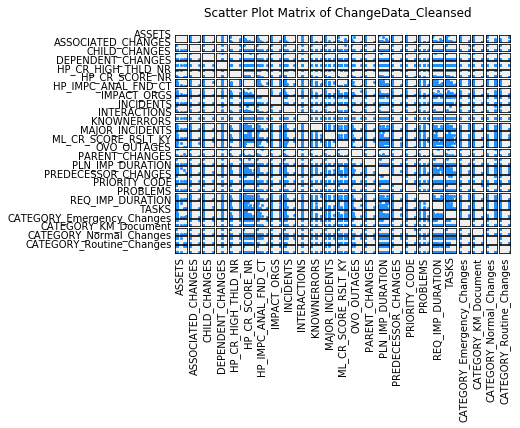

In [17]:
ChangeData_Cleansed.scatter_matrix ()

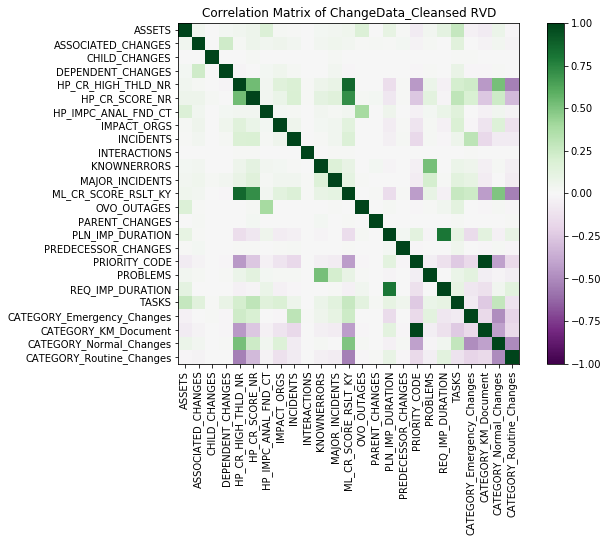

,ASSETS,ASSOCIATED_CHANGES,CHILD_CHANGES,DEPENDENT_CHANGES,HP_CR_HIGH_THLD_NR,HP_CR_SCORE_NR,HP_IMPC_ANAL_FND_CT,IMPACT_ORGS,INCIDENTS,INTERACTIONS,KNOWNERRORS,MAJOR_INCIDENTS,ML_CR_SCORE_RSLT_KY,OVO_OUTAGES,PARENT_CHANGES,PLN_IMP_DURATION,PREDECESSOR_CHANGES,PRIORITY_CODE,PROBLEMS,REQ_IMP_DURATION,TASKS,CATEGORY_Emergency_Changes,CATEGORY_KM_Document,CATEGORY_Normal_Changes,CATEGORY_Routine_Changes
ASSETS,1,0.042,-0.001,0.028,0.042,0.065,0.179,0.019,0.012,0.001,0.024,0.038,0.052,0.172,0.002,0.106,0.009,-0.069,0.035,0.118,0.275,-0.033,-0.069,0.076,-0.008
ASSOCIATED_CHANGES,0.042,1,0.007,0.24,0.02,0.068,0.043,0.061,0.039,-0.001,0.032,0.052,0.035,0.01,0.022,0.008,0.029,-0.025,0.016,0.0,0.143,0.001,-0.025,0.036,-0.027
CHILD_CHANGES,-0.001,0.007,1,0.0,0.003,0.017,-0.001,0.002,-0.005,0.0,0.004,0.02,0.006,0.0,0.0,0.007,0.0,-0.003,0.004,0.007,0.01,0.012,-0.003,-0.006,-0.002
DEPENDENT_CHANGES,0.028,0.24,0.0,1,-0.016,0.003,0.027,0.048,0.019,0.0,0.004,0.038,-0.012,0.001,0.0,0.0,-0.001,-0.009,0.011,-0.007,0.091,-0.011,-0.009,0.015,-0.002
HP_CR_HIGH_THLD_NR,0.042,0.02,0.003,-0.016,1,0.532,0.037,0.15,0.181,0.01,0.07,0.089,0.852,-0.006,0.004,-0.138,0.01,-0.445,0.074,-0.039,0.216,0.236,-0.445,0.516,-0.538
HP_CR_SCORE_NR,0.065,0.068,0.017,0.003,0.532,1,0.033,0.082,0.194,0.011,0.12,0.153,0.711,0.018,0.026,-0.09,0.014,-0.256,0.126,-0.016,0.297,0.201,-0.256,0.249,-0.31
HP_IMPC_ANAL_FND_CT,0.179,0.043,-0.001,0.027,0.037,0.033,1,0.029,0.018,-0.001,0.032,0.02,0.035,0.397,0.004,0.055,0.006,-0.039,0.026,0.079,0.154,0.003,-0.039,0.044,-0.028
IMPACT_ORGS,0.019,0.061,0.002,0.048,0.15,0.082,0.029,1,0.055,0.004,0.027,0.042,0.136,0.006,-0.001,-0.056,0.009,-0.109,0.018,-0.037,0.182,-0.014,-0.109,0.171,-0.12
INCIDENTS,0.012,0.039,-0.005,0.019,0.181,0.194,0.018,0.055,1,0.001,0.012,0.042,0.176,-0.003,-0.003,-0.046,0.018,-0.171,0.022,-0.015,0.065,0.311,-0.171,-0.068,-0.069
INTERACTIONS,0.001,-0.001,0.0,0.0,0.01,0.011,-0.001,0.004,0.001,1,-0.001,0.011,0.012,0.0,0.0,-0.005,0.0,-0.004,-0.002,-0.003,-0.002,0.014,-0.004,-0.004,-0.005


<column_matrix>

In [18]:
# find correlation matrix
ChangeData_Cleansed.corr()

# K-Means Clustering

In [19]:
# Kmeans Clustering

from vertica_ml_python import kmeans
from vertica_ml_python import drop_model

drop_model("ChangeRisk_kmeans",cur)

The model ChangeRisk_kmeans was successfully dropped.


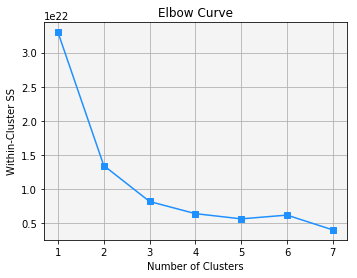

num_clusters,all_within_cluster_SS
1,3.2979218e+22
2,1.3451961e+22
3,8.1856055e+21
4,6.4060274e+21
5,5.6427533e+21
6,6.191932e+21
7,4.0227218e+21


<column_matrix>

In [20]:
# find the optimal number of clusters using the elbow curve.
from vertica_ml_python import elbow
elbow(input_relation="ChangeData_Cleansed",
      input_columns=["PREDECESSOR_CHANGES","PRIORITY_CODE","PROBLEMS","REQ_IMP_DURATION","TASKS",
                     "CATEGORY_Emergency_Changes","CATEGORY_KM_Document","CATEGORY_Normal_Changes",
                     "CATEGORY_Routine_Changes","ASSETS","ASSOCIATED_CHANGES","CHILD_CHANGES","DEPENDENT_CHANGES",
                     "HP_CR_HIGH_THLD_NR","HP_CR_SCORE_NR","HP_IMPC_ANAL_FND_CT","IMPACT_ORGS","INCIDENTS","INTERACTIONS",
                     "KNOWNERRORS","MAJOR_INCIDENTS","ML_CR_SCORE_RSLT_KY","OVO_OUTAGES","PARENT_CHANGES",
                     "PLN_IMP_DURATION"],
      cursor=cur,max_num_cluster=8)

,PREDECESSOR_CHANGES,PRIORITY_CODE,PROBLEMS,REQ_IMP_DURATION,TASKS,CATEGORY_Emergency_Changes,CATEGORY_KM_Document,CATEGORY_Normal_Changes,CATEGORY_Routine_Changes,ASSETS,ASSOCIATED_CHANGES,CHILD_CHANGES,DEPENDENT_CHANGES,HP_CR_HIGH_THLD_NR,HP_CR_SCORE_NR,HP_IMPC_ANAL_FND_CT,IMPACT_ORGS,INCIDENTS,INTERACTIONS,KNOWNERRORS,MAJOR_INCIDENTS,ML_CR_SCORE_RSLT_KY,OVO_OUTAGES,PARENT_CHANGES,PLN_IMP_DURATION
0,0.000317934696213398,2.12854099767908,0.0203796140272788,92820062.0273742,5.19158744793819,0.172543159635011,0.128540997679077,0.542205830922329,0.156710011763584,6.63192700219375,0.00820271516230566,0.000349728165834738,0.000635869392426796,41.3629860426668,44.5454169713541,45.8175690713128,0.0913108447524878,0.321877086446444,0.000158967348106699,0.0203160270880361,0.0273741773439735,14.2979366038216,4.40873684545194,0.000413315105077417,191335456.365498
1,0.013009540329575,2.0,0.0199479618386817,447479922.810928,13.4084995663487,0.0320901994796184,0.0,0.8438855160451,0.124024284475282,18.7103209019948,0.0216825672159584,0.0,0.00173460537727667,51.1188204683435,47.2376409366869,96.4163052905464,0.123156981786644,0.405897658282741,0.0,0.01561144839549,0.0320901994796184,16.4952298352125,3.16045099739809,0.0,1793751538.60191
2,0.0,2.0,0.02,2100213012.18174,11.4417391304348,0.0547826086956522,0.0,0.644347826086957,0.300869565217391,27.1573913043478,0.00782608695652174,0.00434782608695652,0.0,38.8,50.4295652173913,148.340869565217,0.048695652173913,0.231304347826087,0.0,0.0217391304347826,0.0478260869565217,13.8391304347826,71.7278260869565,0.0,1880164525.22348
3,0.0,2.0,0.0182926829268293,5179840283.54573,6.42987804878049,0.0274390243902439,0.0,0.411585365853659,0.560975609756098,42.3109756097561,0.0121951219512195,0.0,0.0,21.9512195121951,18.2256097560976,433.682926829268,0.00304878048780488,0.344512195121951,0.0,0.0274390243902439,0.0213414634146341,7.48475609756098,7.16158536585366,0.0,5171444125.00915


model_type='kmeans'
model_name='ChangeRisk_kmeans'
input_relation='ChangeData_Cleansed'
input_columns='PREDECESSOR_CHANGES,PRIORITY_CODE,PROBLEMS,REQ_IMP_DURATION,TASKS,CATEGORY_Emergency_Changes,CATEGORY_KM_Document,CATEGORY_Normal_Changes,CATEGORY_Routine_Changes,ASSETS,ASSOCIATED_CHANGES,CHILD_CHANGES,DEPENDENT_CHANGES,HP_CR_HIGH_THLD_NR,HP_CR_SCORE_NR,HP_IMPC_ANAL_FND_CT,IMPACT_ORGS,INCIDENTS,INTERACTIONS,KNOWNERRORS,MAJOR_INCIDENTS,ML_CR_SCORE_RSLT_KY,OVO_OUTAGES,PARENT_CHANGES,PLN_IMP_DURATION'



,Cluster SS
0,2.5838442e+21
1,1.1819069e+21
2,1.2804145e+21
3,1.6737732e+21


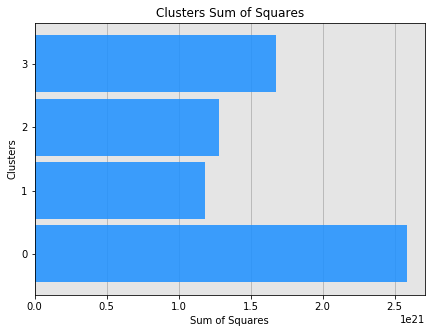

[2.5838442e+21, 1.1819069e+21, 1.2804145e+21, 1.6737732e+21]

In [21]:
# Create Kmeans model, let's try 4 for the number of cluster
ChangeRisk_kmeans=kmeans(model_name="ChangeRisk_kmeans",input_relation="ChangeData_Cleansed",
                   input_columns=["PREDECESSOR_CHANGES","PRIORITY_CODE","PROBLEMS","REQ_IMP_DURATION","TASKS",
                     "CATEGORY_Emergency_Changes","CATEGORY_KM_Document","CATEGORY_Normal_Changes",
                     "CATEGORY_Routine_Changes","ASSETS","ASSOCIATED_CHANGES","CHILD_CHANGES","DEPENDENT_CHANGES",
                     "HP_CR_HIGH_THLD_NR","HP_CR_SCORE_NR","HP_IMPC_ANAL_FND_CT","IMPACT_ORGS","INCIDENTS","INTERACTIONS",
                     "KNOWNERRORS","MAJOR_INCIDENTS","ML_CR_SCORE_RSLT_KY","OVO_OUTAGES","PARENT_CHANGES",
                     "PLN_IMP_DURATION"],
                   num_clusters=4,cursor=cur)

#Let's see what the model looks like.
print(ChangeRisk_kmeans)
ChangeRisk_kmeans.cluster_SS()

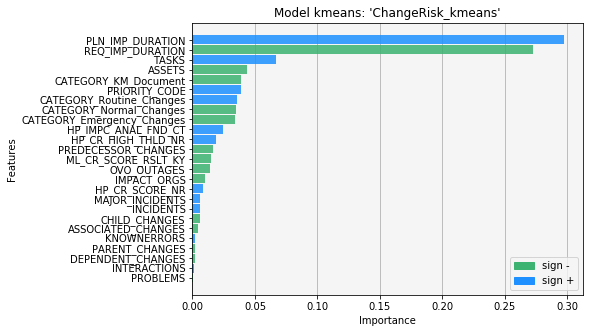

,Importance
PROBLEMS,0.0006876644835680412
INTERACTIONS,0.0012710274199672657
DEPENDENT_CHANGES,0.0018391748614483066
PARENT_CHANGES,0.0020497107305432125
KNOWNERRORS,0.0023374122388086344
ASSOCIATED_CHANGES,0.004048452609304141
CHILD_CHANGES,0.00607868907760498
INCIDENTS,0.006203678907678138
MAJOR_INCIDENTS,0.006344486669904667
HP_CR_SCORE_NR,0.00878613901852183


<column_matrix>

In [22]:
# see the importance of each feature.
ChangeRisk_kmeans.features_importance()

In [23]:
#Let's add the clusters to our RVD.
name=ChangeRisk_kmeans.add_to_rvd(ChangeData_Cleansed)

The new RVC 'kmeans_cluster5983' was added to the RVD.


In [24]:
ChangeData_Cleansed["kmeans_cluster5983"].describe()

,value
0,31350
1,1416
2,990
3,328


<column_matrix>

In [25]:
ChangeData_Cleansed.head(10)

,ASSETS,ASSOCIATED_CHANGES,CATEGORY,CHILD_CHANGES,DEPENDENT_CHANGES,HP_CR_HIGH_THLD_NR,HP_CR_SCORE_NR,HP_IMPC_ANAL_FND_CT,IMPACT_ORGS,INCIDENTS,INTERACTIONS,KNOWNERRORS,MAJOR_INCIDENTS,ML_CHG_IMPC_ASMT_KY,ML_CR_SCORE_RSLT_KY,NUMBER,OVO_OUTAGES,PARENT_CHANGES,PLN_IMP_DURATION,PREDECESSOR_CHANGES,PRIORITY_CODE,PROBLEMS,REQ_IMP_DURATION,RISK_ASSESSMENT,TASKS,CATEGORY_Emergency_Changes,CATEGORY_KM_Document,CATEGORY_Normal_Changes,CATEGORY_Routine_Changes,kmeans_cluster5983
0,0,0,KM Document,0,0,0,0,0,0,0,0,0,0,3,0,C11038046,0,0,0.353979655559168,0,3,0,-0.329715670715802,0,0,0,1,0,0,0
1,0,0,KM Document,0,0,0,0,0,0,0,0,0,0,3,0,C11038048,0,0,0.353981045868653,0,3,0,-0.329715670715802,0,0,0,1,0,0,0
2,0,0,KM Document,0,0,0,0,0,0,0,0,0,0,3,0,C11038095,0,0,0.353979654167467,0,3,0,-0.329715670715802,0,0,0,1,0,0,0
3,0,0,KM Document,0,0,0,0,0,0,0,0,0,0,3,0,C11038193,0,0,0.353981045868653,0,3,0,-0.329715670715802,0,0,0,1,0,0,0
4,0,0,KM Document,0,0,0,0,0,0,0,0,0,0,3,0,C11038198,0,0,0.353981045868653,0,3,0,-0.329715670715802,0,0,0,1,0,0,0
5,0,0,KM Document,0,0,0,0,0,0,0,0,0,0,3,0,C11038199,0,0,0.353981045868653,0,3,0,-0.329715670715802,0,0,0,1,0,0,0
6,0,0,KM Document,0,0,0,0,0,0,0,0,0,0,3,0,C11038254,0,0,0.353981045868653,0,3,0,-0.329715670715802,0,0,0,1,0,0,0
7,0,0,KM Document,0,0,0,0,0,0,0,0,0,0,3,0,C11038310,0,0,0.353979655559168,0,3,0,-0.329715670715802,0,0,0,1,0,0,0
8,0,0,KM Document,0,0,0,0,0,0,0,0,0,0,3,0,C11038376,0,0,0.353981045868653,0,3,0,-0.329715670715802,0,0,0,1,0,0,0
9,0,0,KM Document,0,0,0,0,0,0,0,0,0,0,3,0,C11038385,0,0,0.353981045868653,0,3,0,-0.329715670715802,0,0,0,1,0,0,0


Name: ChangeData_Cleansed, Number of rows: 34084, Number of columns: 30


In [26]:
ChangeData_Cleansed["RISK_ASSESSMENT"].label_encode()

RISK_ASSESSMENT,encoding
30,0
0,1
20,2
10,3


The label encoding was successfully done.


In [ ]:
ChangeData_Cleansed["RISK_ASSESSMENT"].describe()

In [ ]:
ChangeData_Cleansed.dtypes()

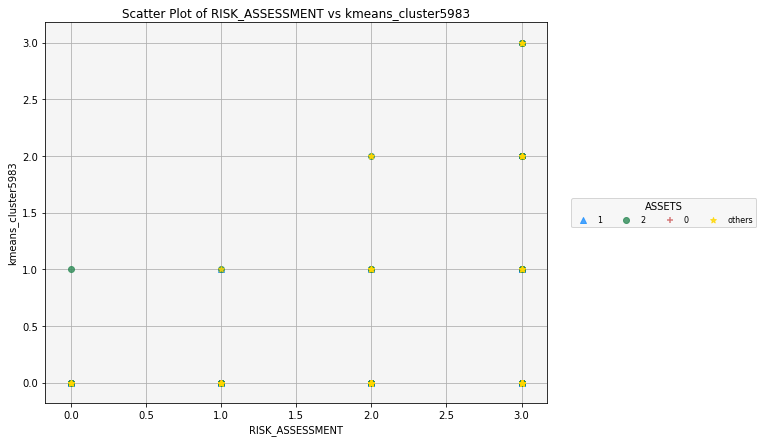

In [28]:
ChangeData_Cleansed.scatter2D(columns=["RISK_ASSESSMENT","kmeans_cluster5983","ASSETS"])

# SVM Classification
Let's now try to see what we can do with the SVM classifier. 
We must use the one hot encoder for the Risk assesment in order to have multiple binary variables.
Looks like in Vertica SVM function, there is no kernel option! And not clear what kernel is used!?

In [29]:
# reload RVD
ChangeData_Cleansed=RVD('ChangeData_Cleansed',cur)

In [30]:
# nomalize the data
ChangeData_Cleansed.normalize() # only apply to float type columns

The RVC 'PLN_IMP_DURATION' was successfully normalized.
The RVC 'REQ_IMP_DURATION' was successfully normalized.


In [31]:
# convert Risk assesment with one hot encoding
ChangeData_Cleansed["RISK_ASSESSMENT"].one_hot_encoder()

4 new features: RISK_ASSESSMENT_0, RISK_ASSESSMENT_10, RISK_ASSESSMENT_20, RISK_ASSESSMENT_30


In [32]:
ChangeData_Cleansed.head()

,ASSETS,ASSOCIATED_CHANGES,CATEGORY,CHILD_CHANGES,DEPENDENT_CHANGES,HP_CR_HIGH_THLD_NR,HP_CR_SCORE_NR,HP_IMPC_ANAL_FND_CT,IMPACT_ORGS,INCIDENTS,INTERACTIONS,KNOWNERRORS,MAJOR_INCIDENTS,ML_CHG_IMPC_ASMT_KY,ML_CR_SCORE_RSLT_KY,NUMBER,OVO_OUTAGES,PARENT_CHANGES,PLN_IMP_DURATION,PREDECESSOR_CHANGES,PRIORITY_CODE,PROBLEMS,REQ_IMP_DURATION,RISK_ASSESSMENT,TASKS,CATEGORY_Emergency_Changes,CATEGORY_KM_Document,CATEGORY_Normal_Changes,CATEGORY_Routine_Changes,RISK_ASSESSMENT_0,RISK_ASSESSMENT_10,RISK_ASSESSMENT_20,RISK_ASSESSMENT_30
0,0,0,KM Document,0,0,0,0,0,0,0,0,0,0,3,0,C11038046,0,0,0.353979655559168,0,3,0,-0.329715670715802,0,0,0,1,0,0,1,0,0,0
1,0,0,KM Document,0,0,0,0,0,0,0,0,0,0,3,0,C11038048,0,0,0.353981045868653,0,3,0,-0.329715670715802,0,0,0,1,0,0,1,0,0,0
2,0,0,KM Document,0,0,0,0,0,0,0,0,0,0,3,0,C11038095,0,0,0.353979654167467,0,3,0,-0.329715670715802,0,0,0,1,0,0,1,0,0,0
3,0,0,KM Document,0,0,0,0,0,0,0,0,0,0,3,0,C11038193,0,0,0.353981045868653,0,3,0,-0.329715670715802,0,0,0,1,0,0,1,0,0,0
4,0,0,KM Document,0,0,0,0,0,0,0,0,0,0,3,0,C11038198,0,0,0.353981045868653,0,3,0,-0.329715670715802,0,0,0,1,0,0,1,0,0,0
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


Name: ChangeData_Cleansed, Number of rows: 34084, Number of columns: 33


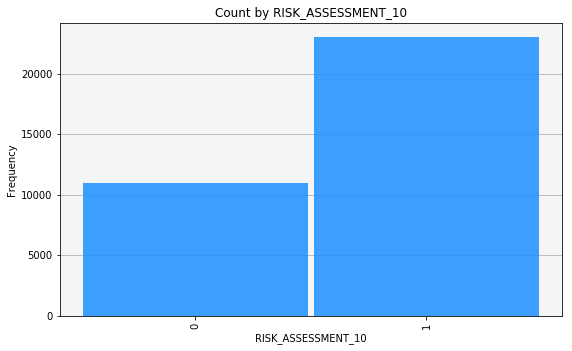

In [33]:
ChangeData_Cleansed["RISK_ASSESSMENT_10"].hist(method="count")

In [34]:
# save RVD to a temporary view
drop_view("ChangeData_temp",cur)
ChangeData_Cleansed.save("ChangeData_temp")

The view ChangeData_temp was successfully dropped.
The RVD was successfully saved.


The model svm_ChangeData was successfully dropped.


,coefficient
Intercept,0.353940026039929
req_imp_duration,0.0709399371218854


model_type='svm_classifier'
model_name='svm_ChangeData'
input_relation='ChangeData_temp'
response_column='RISK_ASSESSMENT_10'
predictor_columns='REQ_IMP_DURATION'
iteration_count: 2
rejected_row_count: 0
accepted_row_count: 34084


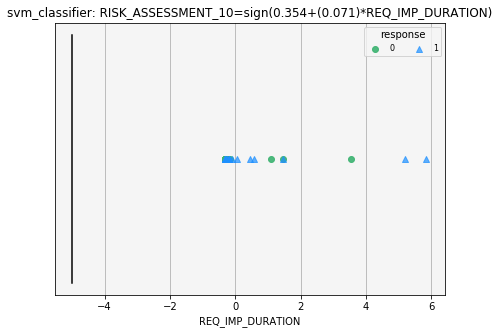

,0,1
0,0,11015
1,0,23069


<column_matrix>

In [35]:
from vertica_ml_python import svm_classifier

# classify RISK_ASSESSMENT_10 first, 
# try one feature only, from kmeans clustereing above we can see, REQ_IMP_DURATION is most important
drop_model("svm_ChangeData",cur)
svm_ChangeData=svm_classifier(model_name="svm_ChangeData",input_relation="ChangeData_temp",response_column="RISK_ASSESSMENT_10",
                   predictor_columns=["REQ_IMP_DURATION"],cursor=cur)

print(svm_ChangeData)
svm_ChangeData.plot()
# looks like not very clear boundary
#Let's see the model accuracy.
svm_ChangeData.error_rate()
svm_ChangeData.confusion_matrix()

The model svm_ChangeData was successfully dropped.


,coefficient
Intercept,0.356569701548138
req_imp_duration,0.492946304313488
pln_imp_duration,-0.497409760966183


model_type='svm_classifier'
model_name='svm_ChangeData'
input_relation='ChangeData_temp'
response_column='RISK_ASSESSMENT_10'
predictor_columns='REQ_IMP_DURATION,PLN_IMP_DURATION'
iteration_count: 3
rejected_row_count: 0
accepted_row_count: 34084


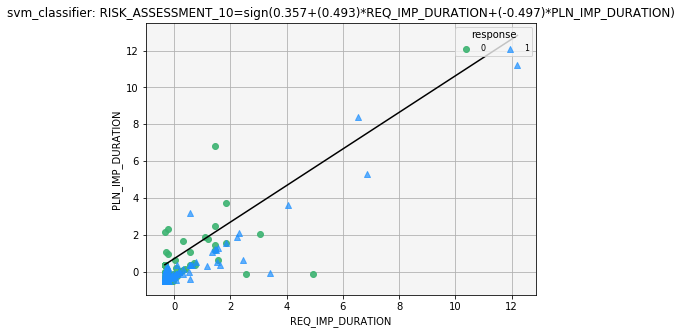

,error_rate
0,0.946709033136632
1,0.023104599245741
total,0.321587841802605


<column_matrix>

In [37]:
# classify RISK_ASSESSMENT_10 first, try two features only, from kmeans clustereing above we can see, REQ_IMP_DURATION 
# and PLN_IMP_DURATION are two most important
drop_model("svm_ChangeData",cur)
svm_ChangeData=svm_classifier(model_name="svm_ChangeData",input_relation="ChangeData_temp",response_column="RISK_ASSESSMENT_10",
                   predictor_columns=["REQ_IMP_DURATION","PLN_IMP_DURATION"],cursor=cur)
print(svm_ChangeData)
svm_ChangeData.plot()
# looks better
#Let's see the model accuracy.
svm_ChangeData.error_rate()

In [38]:
svm_ChangeData.confusion_matrix()

,0,1
0,587,10428
1,533,22536


<column_matrix>

The model svm_ChangeData was successfully dropped.


,coefficient
Intercept,0.523701727124073
req_imp_duration,0.549397528253236
pln_imp_duration,-0.52159314415103
tasks,-0.0304761969164075


model_type='svm_classifier'
model_name='svm_ChangeData'
input_relation='ChangeData_temp'
response_column='RISK_ASSESSMENT_10'
predictor_columns='REQ_IMP_DURATION,PLN_IMP_DURATION,TASKS'
iteration_count: 4
rejected_row_count: 0
accepted_row_count: 34084


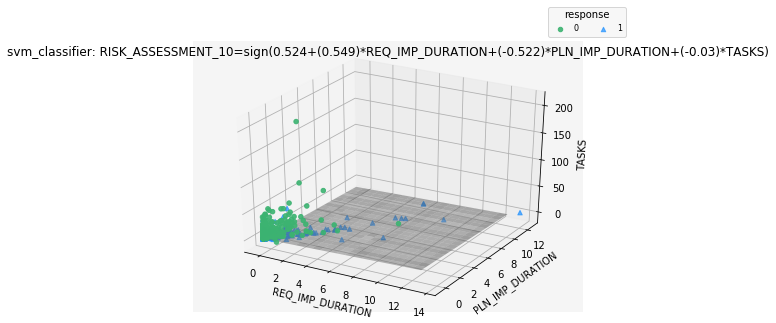

,error_rate
0,0.839491602360418
1,0.0349820104902683
total,0.294977115362047


<column_matrix>

In [39]:
# classify RISK_ASSESSMENT_10 first, try top 3 columns features
drop_model("svm_ChangeData",cur)
svm_ChangeData=svm_classifier(model_name="svm_ChangeData",input_relation="ChangeData_temp",response_column="RISK_ASSESSMENT_10",
                   predictor_columns=["REQ_IMP_DURATION","PLN_IMP_DURATION","TASKS"],cursor=cur)
print(svm_ChangeData)
svm_ChangeData.plot()
# looks ok
#Let's see the model accuracy.
svm_ChangeData.error_rate()

In [41]:
# classify RISK_ASSESSMENT_10 first, try all features
drop_model("svm_ChangeData",cur)
svm_ChangeData=svm_classifier(model_name="svm_ChangeData",input_relation="ChangeData_temp",response_column="RISK_ASSESSMENT_10",
                   predictor_columns=["PREDECESSOR_CHANGES","PRIORITY_CODE","PROBLEMS","REQ_IMP_DURATION","TASKS",
                     "CATEGORY_Emergency_Changes","CATEGORY_KM_Document","CATEGORY_Normal_Changes",
                     "CATEGORY_Routine_Changes","ASSETS","ASSOCIATED_CHANGES","CHILD_CHANGES","DEPENDENT_CHANGES",
                     "HP_CR_HIGH_THLD_NR","HP_CR_SCORE_NR","HP_IMPC_ANAL_FND_CT","IMPACT_ORGS","INCIDENTS","INTERACTIONS",
                     "KNOWNERRORS","MAJOR_INCIDENTS","ML_CR_SCORE_RSLT_KY","OVO_OUTAGES","PARENT_CHANGES",
                     "PLN_IMP_DURATION"],cursor=cur)
print(svm_ChangeData)

#Let's see the model accuracy.
svm_ChangeData.error_rate()

The model svm_ChangeData was successfully dropped.


,coefficient
Intercept,0.482507329880107
predecessor_changes,-0.00846083324607537
priority_code,-0.101685236027362
problems,-0.0615029313474368
req_imp_duration,0.119036145415294
tasks,-0.0497113266004909
category_emergency_changes,0.240191720960355
category_km_document,-1.06669989578758
category_normal_changes,0.225070408104096
category_routine_changes,1.08394509660324


model_type='svm_classifier'
model_name='svm_ChangeData'
input_relation='ChangeData_temp'
response_column='RISK_ASSESSMENT_10'
predictor_columns='PREDECESSOR_CHANGES,PRIORITY_CODE,PROBLEMS,REQ_IMP_DURATION,TASKS,CATEGORY_Emergency_Changes,CATEGORY_KM_Document,CATEGORY_Normal_Changes,CATEGORY_Routine_Changes,ASSETS,ASSOCIATED_CHANGES,CHILD_CHANGES,DEPENDENT_CHANGES,HP_CR_HIGH_THLD_NR,HP_CR_SCORE_NR,HP_IMPC_ANAL_FND_CT,IMPACT_ORGS,INCIDENTS,INTERACTIONS,KNOWNERRORS,MAJOR_INCIDENTS,ML_CR_SCORE_RSLT_KY,OVO_OUTAGES,PARENT_CHANGES,PLN_IMP_DURATION'
iteration_count: 36
rejected_row_count: 0
accepted_row_count: 34084


,error_rate
0,0.377576032682705
1,0.0358923230309073
total,0.146314986503931


<column_matrix>

In [42]:
# not so good, total error rate is 14.6%
svm_ChangeData.confusion_matrix()

,0,1
0,6856,4159
1,828,22241


<column_matrix>

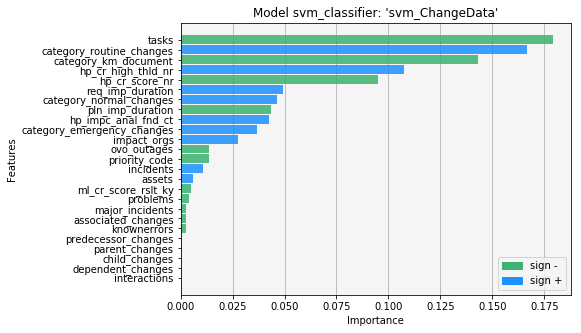

,Importance
interactions,7.364671017022757e-06
dependent_changes,2.1210483058709368e-05
child_changes,3.5161289771939094e-05
parent_changes,5.4610574536756916e-05
predecessor_changes,0.00010594155726164325
knownerrors,0.0025753048115382347
associated_changes,0.0026986946081052963
major_incidents,0.002793457918641579
problems,0.003992966498624201
ml_cr_score_rslt_ky,0.005142365279012632


<column_matrix>

In [43]:
# For this model, we can not plot the hyperplane, but we wan see the importance of each feature.
svm_ChangeData.features_importance()

# SVM Classification on the other classes

In [44]:
# reload data 
ChangeData_Cleansed=RVD('ChangeData_Cleansed',cur)

# nomalize the data
ChangeData_Cleansed.normalize() # only apply to float type columns

# convert Risk assesment with one hot encoding
ChangeData_Cleansed["RISK_ASSESSMENT"].one_hot_encoder()

The RVC 'PLN_IMP_DURATION' was successfully normalized.
The RVC 'REQ_IMP_DURATION' was successfully normalized.
4 new features: RISK_ASSESSMENT_0, RISK_ASSESSMENT_10, RISK_ASSESSMENT_20, RISK_ASSESSMENT_30


In [45]:
# delete the class RISK_ASSESSMENT_10 that has been classified
ChangeData_Cleansed.filter("RISK_ASSESSMENT_10=0")

23069 elements were filtered


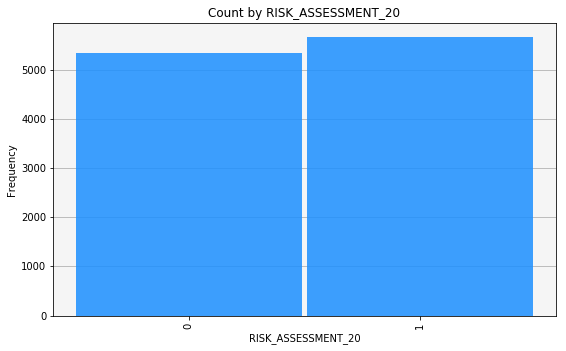

In [46]:
ChangeData_Cleansed["RISK_ASSESSMENT_20"].hist(method="count")

In [47]:
# save RVD to a temporary view
drop_view("ChangeData_temp",cur)
ChangeData_Cleansed.save("ChangeData_temp")

The view ChangeData_temp was successfully dropped.
The RVD was successfully saved.


In [48]:
# classify RISK_ASSESSMENT_20 now, try all columns features
drop_model("svm_ChangeData",cur)
svm_ChangeData=svm_classifier(model_name="svm_ChangeData",input_relation="ChangeData_temp",response_column="RISK_ASSESSMENT_20",
                   predictor_columns=["PREDECESSOR_CHANGES","PRIORITY_CODE","PROBLEMS","REQ_IMP_DURATION","TASKS",
                     "CATEGORY_Emergency_Changes","CATEGORY_KM_Document","CATEGORY_Normal_Changes",
                     "CATEGORY_Routine_Changes","ASSETS","ASSOCIATED_CHANGES","CHILD_CHANGES","DEPENDENT_CHANGES",
                     "HP_CR_HIGH_THLD_NR","HP_CR_SCORE_NR","HP_IMPC_ANAL_FND_CT","IMPACT_ORGS","INCIDENTS","INTERACTIONS",
                     "KNOWNERRORS","MAJOR_INCIDENTS","ML_CR_SCORE_RSLT_KY","OVO_OUTAGES","PARENT_CHANGES",
                     "PLN_IMP_DURATION"],cursor=cur)
print(svm_ChangeData)

#Let's see the model accuracy.
svm_ChangeData.error_rate()

The model svm_ChangeData was successfully dropped.


,coefficient
Intercept,0.154886094883544
predecessor_changes,0.0128213983228085
priority_code,-0.226371337037798
problems,0.028388416309526
req_imp_duration,-0.0619456559456336
tasks,0.00561910559846661
category_emergency_changes,0.304793988240553
category_km_document,-0.536143526804983
category_normal_changes,0.386235633447973
category_routine_changes,0.0


model_type='svm_classifier'
model_name='svm_ChangeData'
input_relation='ChangeData_temp'
response_column='RISK_ASSESSMENT_20'
predictor_columns='PREDECESSOR_CHANGES,PRIORITY_CODE,PROBLEMS,REQ_IMP_DURATION,TASKS,CATEGORY_Emergency_Changes,CATEGORY_KM_Document,CATEGORY_Normal_Changes,CATEGORY_Routine_Changes,ASSETS,ASSOCIATED_CHANGES,CHILD_CHANGES,DEPENDENT_CHANGES,HP_CR_HIGH_THLD_NR,HP_CR_SCORE_NR,HP_IMPC_ANAL_FND_CT,IMPACT_ORGS,INCIDENTS,INTERACTIONS,KNOWNERRORS,MAJOR_INCIDENTS,ML_CR_SCORE_RSLT_KY,OVO_OUTAGES,PARENT_CHANGES,PLN_IMP_DURATION'
iteration_count: 19
rejected_row_count: 0
accepted_row_count: 11015


,error_rate
0,0.241211667913239
1,0.00317628374801482
total,0.118747162959601


<column_matrix>

In [49]:
svm_ChangeData.confusion_matrix()

,0,1
0,4058,1290
1,18,5649


<column_matrix>

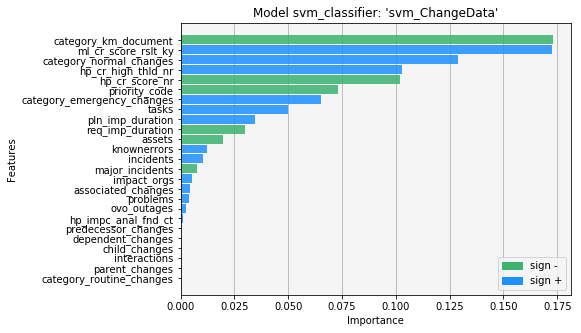

,Importance
category_routine_changes,0.0
parent_changes,3.723318205393741e-06
interactions,1.0606058209551799e-05
child_changes,0.00017838866870990426
dependent_changes,0.0003521270616404152
predecessor_changes,0.000424171978451089
hp_impc_anal_fnd_ct,0.0012593033271782077
ovo_outages,0.002642855582998925
problems,0.0038183390590779565
associated_changes,0.004398350319060909


<column_matrix>

In [50]:
# For this model, we can not plot the hyperplane, but we wan see the importance of each feature.
svm_ChangeData.features_importance()

In [51]:
# Now for rest of two classes  RISK_ASSESSMENT_0 and RISK_ASSESSMENT_30

# reload data 
ChangeData_Cleansed=RVD('ChangeData_Cleansed',cur)

# nomalize the data
ChangeData_Cleansed.normalize() # only apply to float type columns

# convert Risk assesment with one hot encoding
ChangeData_Cleansed["RISK_ASSESSMENT"].one_hot_encoder()

# delete the class RISK_ASSESSMENT_10 and RISK_ASSESSMENT_20 that have been classified
ChangeData_Cleansed.filter(["RISK_ASSESSMENT_10=0","RISK_ASSESSMENT_20=0"])


The RVC 'PLN_IMP_DURATION' was successfully normalized.
The RVC 'REQ_IMP_DURATION' was successfully normalized.
4 new features: RISK_ASSESSMENT_0, RISK_ASSESSMENT_10, RISK_ASSESSMENT_20, RISK_ASSESSMENT_30
23069 elements were filtered
5667 elements were filtered


True

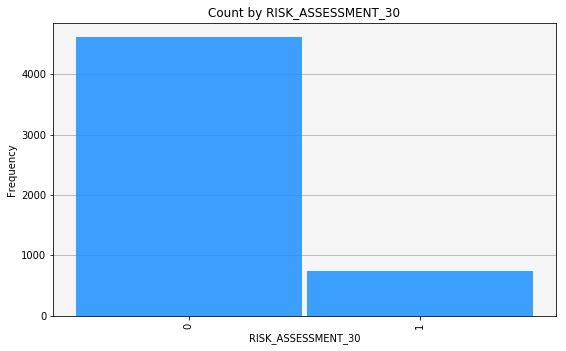

In [52]:
ChangeData_Cleansed["RISK_ASSESSMENT_30"].hist(method="count")

In [53]:
# save RVD to a temporary view
drop_view("ChangeData_temp",cur)
#ChangeData_Cleansed.sql_on_off()
ChangeData_Cleansed.save("ChangeData_temp")

The view ChangeData_temp was successfully dropped.
The RVD was successfully saved.


In [55]:
# classify RISK_ASSESSMENT_30 now, try all columns features
drop_model("svm_ChangeData",cur)
svm_ChangeData=svm_classifier(model_name="svm_ChangeData",input_relation="ChangeData_temp",response_column="RISK_ASSESSMENT_30",
                   predictor_columns=["PREDECESSOR_CHANGES","PRIORITY_CODE","PROBLEMS","REQ_IMP_DURATION","TASKS",
                     "CATEGORY_Emergency_Changes","CATEGORY_KM_Document","CATEGORY_Normal_Changes",
                     "CATEGORY_Routine_Changes","ASSETS","ASSOCIATED_CHANGES","CHILD_CHANGES","DEPENDENT_CHANGES",
                     "HP_CR_HIGH_THLD_NR","HP_CR_SCORE_NR","HP_IMPC_ANAL_FND_CT","IMPACT_ORGS","INCIDENTS","INTERACTIONS",
                     "KNOWNERRORS","MAJOR_INCIDENTS","ML_CR_SCORE_RSLT_KY","OVO_OUTAGES","PARENT_CHANGES",
                     "PLN_IMP_DURATION"],cursor=cur)
print(svm_ChangeData)

#Let's see the model accuracy.
svm_ChangeData.error_rate()

The model svm_ChangeData was successfully dropped.


,coefficient
Intercept,-0.129427016476041
predecessor_changes,0.0
priority_code,-0.34077673048894
problems,0.320601814114822
req_imp_duration,-0.0512607099055704
tasks,0.00664071124690046
category_emergency_changes,-0.0469311850989216
category_km_document,-0.0819226975368582
category_normal_changes,-0.000573133840261662
category_routine_changes,0.0


model_type='svm_classifier'
model_name='svm_ChangeData'
input_relation='ChangeData_temp'
response_column='RISK_ASSESSMENT_30'
predictor_columns='PREDECESSOR_CHANGES,PRIORITY_CODE,PROBLEMS,REQ_IMP_DURATION,TASKS,CATEGORY_Emergency_Changes,CATEGORY_KM_Document,CATEGORY_Normal_Changes,CATEGORY_Routine_Changes,ASSETS,ASSOCIATED_CHANGES,CHILD_CHANGES,DEPENDENT_CHANGES,HP_CR_HIGH_THLD_NR,HP_CR_SCORE_NR,HP_IMPC_ANAL_FND_CT,IMPACT_ORGS,INCIDENTS,INTERACTIONS,KNOWNERRORS,MAJOR_INCIDENTS,ML_CR_SCORE_RSLT_KY,OVO_OUTAGES,PARENT_CHANGES,PLN_IMP_DURATION'
iteration_count: 19
rejected_row_count: 0
accepted_row_count: 5348


,error_rate
0,0.00498158977691141
1,0.0875512995896033
total,0.0162677636499626


<column_matrix>

In [56]:
svm_ChangeData.confusion_matrix()

,0,1
0,4594,23
1,64,667


<column_matrix>

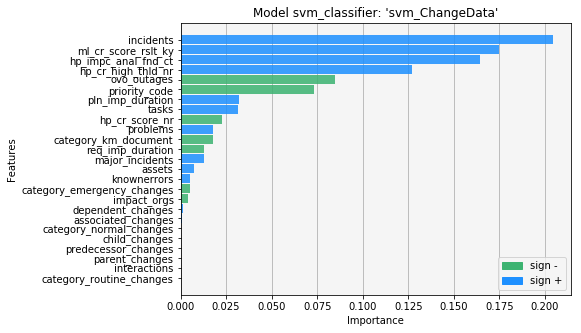

,Importance
category_routine_changes,0.0
interactions,0.0
parent_changes,0.0
predecessor_changes,0.0
child_changes,5.119874687336758e-07
category_normal_changes,0.00011264853475325842
associated_changes,0.0009424707475413394
dependent_changes,0.001117897524039147
impact_orgs,0.0038827266560258595
category_emergency_changes,0.005327114876363205


<column_matrix>

In [57]:
# For this model, we can not plot the hyperplane, but we wan see the importance of each feature.
svm_ChangeData.features_importance()

In [61]:
# summarize three classifiers
Total_error_rate=(1-(22241+5649+667+4594)/34084)*100
print(Total_error_rate,'%')

2.7373547705668355 %


In [ ]:
# Note, this notebook does not perform any prediction. In reality, data set should be split in to training and testing sets.